In [1]:
import pandas as pd
import copy 

In [5]:
d='10:23:34 PM'
pd.to_datetime(d).strftime('%H')

Timestamp('2020-05-18 22:23:34')

In [15]:
from datetime import datetime
d='01/01/2001 11:00:00 PM'
datetime.strptime(d, '%m/%d/%Y %I:%M:%S %p').strftime('%H')

'23'

In [20]:
L = ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 
         'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 
         'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']

In [31]:
L[21]

'Location'

In [2]:
df = pd.read_csv("Crimes_-_2001_to_present.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
yr=["2015","2016","2017","2018","2019"]
df_beat=df[df.Year.isin(yr)]

In [16]:
df_beat

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
6,11227503,JB146383,01/01/2015 12:01:00 AM,061XX S KILBOURN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,...,13.0,65.0,17,NaN,NaN,2015,04/12/2019 04:00:15 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110995,11703089,JC282400,05/26/2019 11:29:00 AM,021XX W GRACE ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER,False,False,...,47.0,5.0,11,NaN,NaN,2019,06/02/2019 04:09:42 PM,NaN,NaN,NaN
7110996,11700926,JC279725,05/26/2019 05:13:00 PM,036XX W DOUGLAS BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,24.0,29.0,26,1152126.0,1893208.0,2019,06/30/2019 03:56:27 PM,41.862830,-87.717040,"(41.862830429, -87.717040084)"
7110997,24560,JC279072,05/26/2019 06:48:00 AM,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,False,...,25.0,28.0,01A,1167752.0,1893853.0,2019,07/16/2019 04:17:29 PM,41.864278,-87.659660,"(41.864278228, -87.659660218)"
7110998,24559,JC278908,05/26/2019 02:11:00 AM,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,25.0,28.0,01A,1167746.0,1893853.0,2019,06/02/2019 04:09:42 PM,41.864278,-87.659682,"(41.864278357, -87.659682244)"


In [17]:
len(df_beat.Beat.unique())

274

In [49]:
df.applymap(lambda x: not x or pd.isnull(x)).sum()

ID                            0
Case Number                   4
Date                          0
Block                         0
IUCR                          0
Primary Type                  0
Description                   0
Location Description       6584
Arrest                  5162539
Domestic                6164414
Beat                          0
District                     47
Ward                     614827
Community Area           613586
FBI Code                      0
X Coordinate              68494
Y Coordinate              68494
Year                          0
Updated On                    0
Latitude                  68331
Longitude                 68331
Location                  68331
dtype: int64

In [54]:
df1 = copy.copy(df)

In [79]:
df1.iloc[:,3] = df.iloc[:,3].apply(lambda x: x.split(" ")[0])

In [80]:
years = ['2017','2018','2019']
df1 = df1[df1['Year'].isin(years)]

In [57]:
df2 = pd.DataFrame(df1.groupby("Block")["ID"].count()).sort_values(by="ID",ascending=False)

In [58]:
df2.ID.sum()

795581

In [59]:
df2.head(10)

,ID
Block,
0000X,30095
001XX,21758
002XX,17449
003XX,15428
008XX,14743
015XX,14328
014XX,13640
006XX,13589
007XX,13487


In [75]:
df2 = pd.read_csv("CommAreas.csv")

In [76]:
df3 = pd.read_csv("IUCR.csv")

In [77]:
df4 = pd.read_csv("WARDS_2015.csv")

In [78]:
#df1.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [79]:
df2.head()

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906


In [80]:
df3.head()

,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,INDEX CODE
0,110,HOMICIDE,FIRST DEGREE MURDER,I
1,130,HOMICIDE,SECOND DEGREE MURDER,I
2,141,HOMICIDE,INVOLUNTARY MANSLAUGHTER,N
3,142,HOMICIDE,RECKLESS HOMICIDE,N
4,261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,I


In [81]:
df4.head()

,the_geom,WARD,SHAPE_Leng,SHAPE_Area
0,MULTIPOLYGON (((-87.69623470134458 41.85755495...,12,93073.340838,1.160965e+08
1,MULTIPOLYGON (((-87.66288923669032 41.79883809...,16,97901.323833,1.031436e+08
2,MULTIPOLYGON (((-87.69817510963803 41.81729440...,15,82183.694820,6.558830e+07
3,MULTIPOLYGON (((-87.65524133440029 41.80883316...,20,90105.195618,1.372904e+08
4,MULTIPOLYGON (((-87.66420403810295 42.02126158...,49,38122.692826,4.973346e+07


# Ex3

In [80]:
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.sql.functions import *
from pyspark.sql.window import Window
from datetime import datetime

# crime_path1 =  "Crimes_-_2001_to_present.csv"   #"hdfs://wolf.analytics.private/user/zzm7646/data/Crimes_-_2001_to_present.csv"
# crime_path2 =  "Crimes_2020.csv"                #"hdfs://wolf.analytics.private/user/zzm7646/data/Crimes_2020.csv" 

# sc = SparkContext()
# sqlcontext = SQLContext(sc)

# crime1 = sqlcontext.read.csv(crime_path1, header = True)
# crime2 = sqlcontext.read.csv(crime_path2, header = True)
# crime3 = crime1.union(crime2)

In [69]:
# get wek number of year
crime4 = crime3.withColumn('short_date', col('Date').substr(1, 10))\
               .withColumn('date_time', to_timestamp('Date', 'MM/dd/yyyy'))\
               .where(col('date_time').isNotNull())\
               .withColumn('weekofYear', weekofyear('date_time'))\
               .select('Beat','IUCR','Year','weekofYear')
#all crime
# group by beat and weekofDay get weekly crime events
crime = crime4.groupBy('Beat','Year','weekofYear').count().orderBy('Beat','Year','weekofYear')


#HOMICIDE
crime_h = crime4.filter(col('Primary Type')=='HOMICIDE').groupBy('Beat','Year','weekofYear').count().orderBy('Beat','Year','weekofYear')

#ROBBERY
crime_r = crime4.filter(col('Primary Type')=='ROBBERY').groupBy('Beat','Year','weekofYear').count().orderBy('Beat','Year','weekofYear')

#ASSAULT
crime_a = crime4.filter(col('Primary Type')=='ASSAULT').groupBy('Beat','Year','weekofYear').count().orderBy('Beat','Year','weekofYear')


In [71]:
crime.show(10, truncate = False)

+----+----+----------+-----+
|Beat|Year|weekofYear|count|
+----+----+----------+-----+
|0111|2001|1         |35   |
|0111|2001|2         |36   |
|0111|2001|3         |43   |
|0111|2001|4         |29   |
|0111|2001|5         |23   |
|0111|2001|6         |36   |
|0111|2001|7         |21   |
|0111|2001|8         |26   |
|0111|2001|9         |29   |
|0111|2001|10        |32   |
+----+----+----------+-----+
only showing top 10 rows



In [81]:
crime_new = crime.withColumn("row_num", row_number().over(Window.partitionBy("Beat").orderBy("Year")))

In [83]:
crime_new.show(20)

+----+----+----------+-----+-------+
|Beat|Year|weekofYear|count|row_num|
+----+----+----------+-----+-------+
|1512|2001|         1|   39|      1|
|1512|2001|         2|   29|      2|
|1512|2001|         3|   29|      3|
|1512|2001|         4|   28|      4|
|1512|2001|         5|   35|      5|
|1512|2001|         6|   16|      6|
|1512|2001|         7|   30|      7|
|1512|2001|         8|   30|      8|
|1512|2001|         9|   33|      9|
|1512|2001|        10|   31|     10|
|1512|2001|        11|   28|     11|
|1512|2001|        12|   39|     12|
|1512|2001|        13|   37|     13|
|1512|2001|        14|   31|     14|
|1512|2001|        15|   35|     15|
|1512|2001|        16|   35|     16|
|1512|2001|        17|   41|     17|
|1512|2001|        18|   41|     18|
|1512|2001|        19|   39|     19|
|1512|2001|        20|   23|     20|
+----+----+----------+-----+-------+
only showing top 20 rows



In [88]:
# Set the window
w = Window.partitionBy('Beat').orderBy(("row_num"))

# Create the lagged value
lag_1wk = lag('count',count=1).over(w)
lag_2wk = lag('count',count=2).over(w)
lag_4wk = lag('count',count=4).over(w)
lag_24wk = lag('count',count=24).over(w)
lag_52wk = lag('count',count=52).over(w)

# Add the lagged values to a new column
crime_modelling = crime_new.withColumn('1wk_lag', lag_1wk)\
                           .withColumn('2wk_lag', lag_2wk)\
                           .withColumn('4wk_lag', lag_4wk)\
                           .withColumn('24wk_lag', lag_24wk)\
                           .withColumn('52wk_lag', lag_52wk)

In [90]:
crime_modelling.show(60)

+----+----+----------+-----+-------+-------+-------+-------+--------+--------+
|Beat|Year|weekofYear|count|row_num|1wk_lag|2wk_lag|4wk_lag|24wk_lag|52wk_lag|
+----+----+----------+-----+-------+-------+-------+-------+--------+--------+
|1512|2001|         1|   39|      1|   null|   null|   null|    null|    null|
|1512|2001|         2|   29|      2|     39|   null|   null|    null|    null|
|1512|2001|         3|   29|      3|     29|     39|   null|    null|    null|
|1512|2001|         4|   28|      4|     29|     29|   null|    null|    null|
|1512|2001|         5|   35|      5|     28|     29|     39|    null|    null|
|1512|2001|         6|   16|      6|     35|     28|     29|    null|    null|
|1512|2001|         7|   30|      7|     16|     35|     29|    null|    null|
|1512|2001|         8|   30|      8|     30|     16|     28|    null|    null|
|1512|2001|         9|   33|      9|     30|     30|     35|    null|    null|
|1512|2001|        10|   31|     10|     33|     30|

In [46]:
# modelling_h = crime_h.withColumn('1wk_lag', 
#                                       lag(wk_crime['count']).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('2wk_lag', 
#                                       lag(wk_crime['count'],count=2).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('4wk_lag', 
#                                       lag(wk_crime['count'],count=4).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('24wk_lag', 
#                                       lag(wk_crime['count'],count=24).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('52wk_lag', 
#                                       lag(wk_crime['count'],count=52).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))

In [47]:
# modelling_r = crime_r.withColumn('1wk_lag', 
#                                       lag(wk_crime['count']).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('2wk_lag', 
#                                       lag(wk_crime['count'],count=2).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('4wk_lag', 
#                                       lag(wk_crime['count'],count=4).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('24wk_lag', 
#                                       lag(wk_crime['count'],count=24).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('52wk_lag', 
#                                       lag(wk_crime['count'],count=52).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))

In [48]:
# modelling_a = crime_a.withColumn('1wk_lag', 
#                                       lag(wk_crime['count']).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('2wk_lag', 
#                                       lag(wk_crime['count'],count=2).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('4wk_lag', 
#                                       lag(wk_crime['count'],count=4).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('24wk_lag', 
#                                       lag(wk_crime['count'],count=24).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))\
#                           .withColumn('52wk_lag', 
#                                       lag(wk_crime['count'],count=52).over(Window.orderBy(["Year","weekofYear"]).partitionBy('Beat')))

In [58]:
crime_modelling.printSchema()

root
 |-- Beat: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- weekofYear: integer (nullable = true)
 |-- count: long (nullable = false)
 |-- 1wk_lag: long (nullable = true)
 |-- 2wk_lag: long (nullable = true)
 |-- 4wk_lag: long (nullable = true)
 |-- 24wk_lag: long (nullable = true)
 |-- 52wk_lag: long (nullable = true)



In [106]:
data = crime_modelling.filter(crime_modelling.Year >= 2015)

In [108]:
data.show()

+----+----+----------+-----+-------+-------+-------+-------+--------+--------+
|Beat|Year|weekofYear|count|row_num|1wk_lag|2wk_lag|4wk_lag|24wk_lag|52wk_lag|
+----+----+----------+-----+-------+-------+-------+-------+--------+--------+
|1512|2015|         1|   10|    733|     12|     21|     16|      17|      14|
|1512|2015|         2|   12|    734|     10|     12|     20|      27|       8|
|1512|2015|         3|   12|    735|     12|     10|     21|      26|      18|
|1512|2015|         4|   14|    736|     12|     12|     12|      19|      17|
|1512|2015|         5|   15|    737|     14|     12|     10|      10|       9|
|1512|2015|         6|   11|    738|     15|     14|     12|      17|      10|
|1512|2015|         7|   15|    739|     11|     15|     12|      27|      17|
|1512|2015|         8|   18|    740|     15|     11|     14|      12|      16|
|1512|2015|         9|   11|    741|     18|     15|     15|      29|      22|
|1512|2015|        10|   13|    742|     11|     18|

In [115]:
df = data.drop('Beat','Year','weekofYear','row_num').withColumnRenamed('count','label')

In [127]:
df.columns

['label', '1wk_lag', '2wk_lag', '4wk_lag', '24wk_lag', '52wk_lag']

In [128]:
df.count()

KeyboardInterrupt: 

In [122]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['1wk_lag','2wk_lag','4wk_lag','24wk_lag','52wk_lag'], outputCol='features')


# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = df.randomSplit([0.8, 0.2])

# Train a RandomForest model.
rf = RandomForestRegressor(labelCol="label", featuresCol="features")

# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[assembler, rf])

In [92]:
testData.show(10)

+----+-----+-------+-------+-------+-------+--------+--------+
|Beat|count|row_num|1wk_lag|2wk_lag|4wk_lag|24wk_lag|52wk_lag|
+----+-----+-------+-------+-------+-------+--------+--------+
|1512|    5|   1013|     12|     22|     22|      14|      15|
|1512|    7|    785|     15|     12|     21|      14|      10|
|1512|    8|    951|     18|     15|      9|      14|      11|
|1512|    9|    685|     17|     18|     14|      18|      11|
|1512|   10|    660|     23|     16|     21|      21|       9|
|1512|   10|    713|     19|     26|     17|      22|      18|
|1512|   10|    733|     12|     21|     16|      17|      14|
|1512|   10|    873|      9|     11|     22|      15|      14|
|1512|   10|    894|     14|     14|     12|      16|       8|
|1512|   10|    955|     20|     16|      8|       8|      16|
+----+-----+-------+-------+-------+-------+--------+--------+
only showing top 10 rows



In [123]:
# # The hyperparameter grid predefines parameter values to test when we run the model. 
# from pyspark.ml.tuning import ParamGridBuilder
# import numpy as np

# paramGrid = ParamGridBuilder() \
#     .addGrid(rf.numTrees, [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]) \
#     .addGrid(rf.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
#     .build()

In [124]:
# # use three folds cross-validation
# from pyspark.ml.tuning import CrossValidator
# from pyspark.ml.evaluation import RegressionEvaluator

# crossval = CrossValidator(estimator=pipeline,
#                           estimatorParamMaps=paramGrid,
#                           evaluator=RegressionEvaluator(),
#                           numFolds=3)

In [126]:
model = pipeline.fit(trainingData)

KeyboardInterrupt: 

In [ ]:
# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.show(5)

In [ ]:
import matplotlib.pyplot as plt

evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)

print("Model Performance RMSE: %f" % rmse)

In [ ]:
importances = model.featureImportances

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

In [1]:
# Root - format convention
from pyspark.sql import SQLContext
from pyspark import SparkContext

sc = SparkContext()
sqlcontext = SQLContext(sc)

crime_path = "Crimes_-_2001_to_present.csv"
crime = sqlcontext.read.csv(crime_path, header = True)

In [2]:
crime

DataFrame[ID: string, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string]

In [3]:
crime.show(10)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|01/01/2001 11:00:...|     016XX E 86TH PL|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|  

In [4]:
crime.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [3]:
crime.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [6]:
crime.select("Date").show(10, truncate = False)

+----------------------+
|Date                  |
+----------------------+
|01/01/2001 11:00:00 AM|
|10/08/2017 03:00:00 AM|
|03/28/2017 02:00:00 PM|
|09/09/2017 08:17:00 PM|
|08/26/2017 10:00:00 AM|
|02/10/2013 12:00:00 AM|
|01/01/2015 12:01:00 AM|
|01/01/2017 12:01:00 AM|
|07/17/2017 10:10:00 AM|
|12/28/2017 03:55:00 PM|
+----------------------+
only showing top 10 rows



## Exercise 1

In [8]:
# import datetime
# from pyspark.sql.functions import *

# ### Get Month from date in pyspark
# new_crime = crime.withColumn('date_time', to_timestamp('Date', 'MM/dd/yyyy hh:mm:ss a'))\
#                  .where(col('date_time').isNotNull())\
#                  .withColumn('Month', month('date_time'))
# #        .withColumn('Month', trunc('date_time', 'mm'))

In [9]:
from pyspark.sql.functions import *
from datetime import datetime

funcMonth =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p').strftime('%m'))

### Get Month from date in pyspark
new_crime = crime.withColumn('Month', funcMonth(col('Date')))

In [10]:
new_crime.select("Date","Month").show(10, truncate = False)

+----------------------+-----+
|Date                  |Month|
+----------------------+-----+
|01/01/2001 11:00:00 AM|01   |
|10/08/2017 03:00:00 AM|10   |
|03/28/2017 02:00:00 PM|03   |
|09/09/2017 08:17:00 PM|09   |
|08/26/2017 10:00:00 AM|08   |
|02/10/2013 12:00:00 AM|02   |
|01/01/2015 12:01:00 AM|01   |
|01/01/2017 12:01:00 AM|01   |
|07/17/2017 10:10:00 AM|07   |
|12/28/2017 03:55:00 PM|12   |
+----------------------+-----+
only showing top 10 rows



In [11]:
monthly_crime = new_crime.groupBy('Year','Month').count().orderBy("count", ascending=False)

In [12]:
monthly_crime.show()

+----+-----+-----+
|Year|Month|count|
+----+-----+-----+
|2002|   07|46013|
|2001|   07|44693|
|2003|   08|44269|
|2002|   08|44210|
|2001|   08|44032|
|2003|   07|43416|
|2003|   10|43328|
|2004|   07|43238|
|2002|   10|43144|
|2004|   08|43044|
|2001|   10|43028|
|2002|   05|42913|
|2002|   06|42835|
|2002|   09|42388|
|2001|   05|41821|
|2005|   07|41807|
|2001|   06|41725|
|2006|   07|41549|
|2005|   08|41544|
|2004|   10|41524|
+----+-----+-----+
only showing top 20 rows



In [13]:
avg_monthly_crime = monthly_crime.groupBy('Month').mean('count').orderBy("avg(count)", ascending=False)

In [14]:
avg_monthly_crime.show(5, truncate=False)

+-----+------------------+
|Month|avg(count)        |
+-----+------------------+
|07   |34506.05263157895 |
|08   |34159.15789473684 |
|05   |32995.73684210526 |
|06   |32839.52631578947 |
|10   |32353.894736842107|
+-----+------------------+
only showing top 5 rows



In [49]:
crime.select(min('Date').alias('first_record_date'), max('Date').alias('latest_record_date')).show(truncate=False)

+----------------------+----------------------+
|first_record_date     |latest_record_date    |
+----------------------+----------------------+
|01/01/2001 01:00:00 AM|12/31/2019 12:58:00 AM|
+----------------------+----------------------+



In [16]:
pddf_crime = avg_monthly_crime.toPandas()

In [12]:
pddf_crime['Month'] = pddf_crime['Month'].apply(lambda x: int(x))
# round decimal and plus 1 
pddf_crime.iloc[:,1] = pddf_crime.iloc[:,1].apply(lambda x: int(x)+1)
pddf_crime.rename(columns={'avg(count)':'Average Monthly Crime Events'},inplace=True)

In [13]:
pddf_crime

,Month,Average Monthly Crime Events
0,7,34507
1,8,34160
2,5,32996
3,6,32840
4,10,32354
5,9,32009
6,3,29708
7,4,29537
8,11,29135
9,1,28405


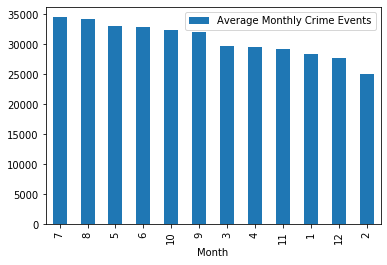

In [15]:
ax = pddf_crime.plot.bar(x='Month', y='Average Monthly Crime Events')
#ax.figure.savefig('average_monthly_crime_events.jpg',dpi=480)

In [196]:
pddf_crime.to_csv("zhu_1.txt",index=None, sep='\t', mode='a')

In [14]:
writePath = '/Users/zach/hw2/zhu_1.txt'
with open(writePath, 'a') as f:
    f.write(pddf_crime.to_string(header = False, index = False))

## Exercise4

In [25]:
from pyspark.sql.functions import *
from datetime import datetime

In [26]:
crime4 = crime.filter(crime["Arrest"]=="true")

NameError: name 'crime' is not defined

In [126]:
crime4.count()

1948462

In [178]:
# function to get day of the week
funcWeekDay =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p').strftime('%w'))
funcHour =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p').strftime('%H'))


# get month, weekday and time of the day (hour) 
crime4 = crime4.withColumn('Month', col('Date').substr(1, 2))\
               .withColumn('Hour',funcHour(col('Date')))\
               .withColumn('weekDay', funcWeekDay(col('Date')))

In [124]:
crime4.select('Arrest','Date','Year','Month','weekDay','partDay').show(10, truncate = False)

+------+----------------------+----+-----+-------+---------+
|Arrest|Date                  |Year|Month|weekDay|partDay  |
+------+----------------------+----+-----+-------+---------+
|true  |01/01/2011 12:01:00 AM|2011|1    |6      |night    |
|true  |09/01/2014 08:00:00 AM|2014|9    |1      |morning  |
|true  |08/24/2017 03:18:00 PM|2017|8    |4      |afternoon|
|true  |07/01/2018 11:59:00 AM|2018|7    |0      |morning  |
|true  |07/16/2014 10:50:00 AM|2014|7    |3      |morning  |
|true  |10/10/2018 10:00:00 AM|2018|10   |3      |morning  |
|true  |05/24/2018 06:00:00 AM|2018|5    |4      |morning  |
|true  |01/24/2009 06:00:00 PM|2009|1    |6      |evening  |
|true  |05/30/2014 11:06:56 AM|2014|5    |5      |morning  |
|true  |10/10/2018 11:25:00 AM|2018|10   |3      |morning  |
+------+----------------------+----+-----+-------+---------+
only showing top 10 rows



In [179]:
crime4.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- date_time: timestamp (nullable = true)
 |-- Month: integer (nullable = true)
 |-- weekDay: string (nul

In [147]:
crime4.select('weekDay').distinct().show()

+-------+
|weekDay|
+-------+
|      3|
|      0|
|      5|
|      6|
|      1|
|      4|
|      2|
+-------+



In [144]:
crime4.select('partDay').distinct().show()

+---------+
|  partDay|
+---------+
|afternoon|
|    night|
|  morning|
|  evening|
+---------+



In [134]:
crime4.select('Month').distinct().show()

+-----+
|Month|
+-----+
|   12|
| null|
|    1|
|    6|
|    3|
|    5|
|    9|
|    4|
|    8|
|    7|
|   10|
|   11|
|    2|
+-----+



## with arrest with respect to time of the day

In [181]:
time_arrest = crime4.groupBy('hour').count().orderBy('count', ascending=False)
pddf_time_day_arrest = time_arrest.toPandas()
pddf_time_day_arrest.rename(columns={'count':'Time Of Day Crimes with Arrest'},inplace=True)

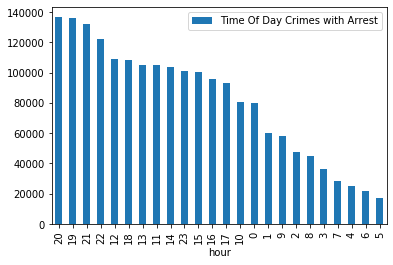

In [201]:
ax = pddf_time_day_arrest.plot.bar(x='hour', y='Time Of Day Crimes with Arrest')
ax.figure.savefig('time_of_day_crime_arrest.jpg',dpi=480)

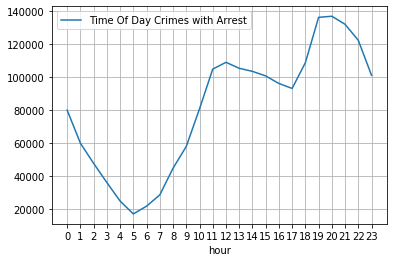

In [205]:
import numpy as np
ax = pddf_time_day_arrest.sort_values(by='hour').plot.line(x='hour', y='Time Of Day Crimes with Arrest',grid=True)
major_ticks = np.arange(0, 24, 1)
ax.set_xticks(major_ticks)
ax.figure.savefig('time_of_day_crime_arrest_line.jpg',dpi=480)

## with arrest with respect to day of the week

In [206]:
weekday_arrest = crime4.groupBy('weekDay').count().orderBy('count', ascending=False)
pddf_weekday_arrest = weekday_arrest.toPandas()
pddf_weekday_arrest['weekDay'] = pddf_weekday_arrest['weekDay'].apply(lambda x: int(x))
pddf_weekday_arrest.rename(columns={'count':'Week of Day Crimes with Arrest'},inplace=True)

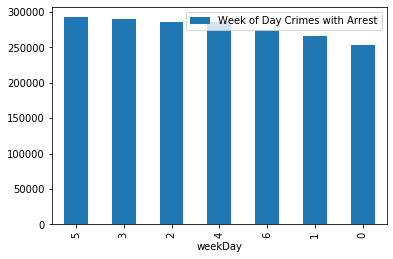

In [209]:
ax = pddf_weekday_arrest.plot.bar(x='weekDay', y='Week of Day Crimes with Arrest')
ax.figure.savefig('weekDay_crime_arrest.jpg',dpi=480)

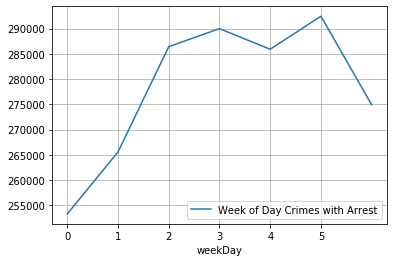

In [212]:
ax = pddf_weekday_arrest.sort_values(by='weekDay').plot.line(x='weekDay', y='Week of Day Crimes with Arrest',grid=True)
major_ticks = np.arange(0, 6, 1)
ax.set_xticks(major_ticks)
ax.figure.savefig('weekDay_crime_arrest_line.jpg',dpi=480)

## with arrest with respect to month

In [213]:
monthly_arrest = crime4.groupBy('Month').count().orderBy('count', ascending=False)
pddf_monthly_arrest = monthly_arrest.toPandas()
pddf_monthly_arrest['Month'] = pddf_monthly_arrest['Month'].apply(lambda x: int(x))
pddf_monthly_arrest.rename(columns={'count':'Monthly Crimes with Arrest'},inplace=True)

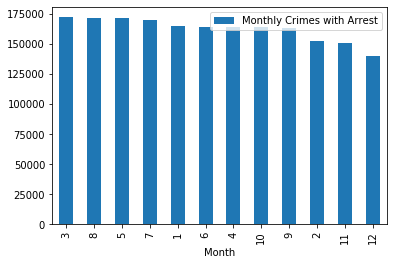

In [214]:
ax = pddf_monthly_arrest.plot.bar(x='Month', y='Monthly Crimes with Arrest')
ax.figure.savefig('monthly_crime_arrest.jpg',dpi=480)

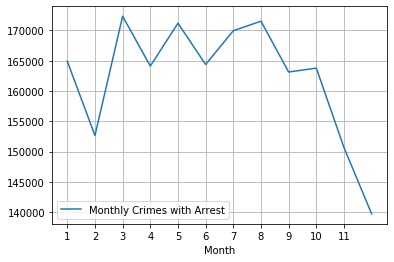

In [215]:
ax = pddf_monthly_arrest.sort_values(by='Month').plot.line(x='Month', y='Monthly Crimes with Arrest',grid=True)
major_ticks = np.arange(1, 12, 1)
ax.set_xticks(major_ticks)
ax.figure.savefig('monthly_crime_arrest_line.jpg',dpi=480)

In [6]:
# Data Cleansing/Imputation Steps
from pyspark.sql.functions import *

titanic = titanic.withColumn("Embarked", 
                             when(col('Embarked') == '', "C")\
                             .otherwise(col('Embarked')))

In [7]:
titanic.show(10)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|  35|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [8]:
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import Imputer
#NOT mllib

titanic = titanic.withColumn("Age", titanic["Age"].cast(DoubleType()))

#Fill empty ages with the mean age of all passengers, rather than remove the nulls
imputer = Imputer(
    inputCols=['Age'],
    outputCols=["new_Age"]
)
titanic = imputer.setStrategy("mean").fit(titanic).transform(titanic)

In [9]:
temp = imputer.setStrategy("mean").fit(titanic)
temp.show(10)

AttributeError: 'ImputerModel' object has no attribute 'show'

In [10]:
titanic.select('PassengerId', 'Survived', 'Age', 'new_Age').show(10)

+-----------+--------+----+-----------------+
|PassengerId|Survived| Age|          new_Age|
+-----------+--------+----+-----------------+
|          1|       0|22.0|             22.0|
|          2|       1|38.0|             38.0|
|          3|       1|26.0|             26.0|
|          4|       1|35.0|             35.0|
|          5|       0|35.0|             35.0|
|          6|       0|null|29.69911764705882|
|          7|       0|54.0|             54.0|
|          8|       0| 2.0|              2.0|
|          9|       1|27.0|             27.0|
|         10|       1|14.0|             14.0|
+-----------+--------+----+-----------------+
only showing top 10 rows



In [16]:
titanic.withColumn("Title", regexp_replace(col('Name'), '(.*, )|(\\..*)', '')).select("Title").distinct().show(24)

+------------+
|       Title|
+------------+
|         Don|
|        Miss|
|         Col|
|         Rev|
|        Lady|
|      Master|
|         Mme|
|        Capt|
|          Mr|
|          Dr|
|         Mrs|
|         Sir|
|    Jonkheer|
|        Mlle|
|       Major|
|          Ms|
|the Countess|
+------------+



In [17]:
from pyspark.sql.functions import *

#Extracting Titles from a String with regex
titanic_titles = titanic.withColumn("Title", regexp_replace(col('Name'), '(.*, )|(\\..*)', ''))

#Create lists of title groups which are uncommon
rare_title = ['Dona', 'Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
Miss = ['Mlle', 'Ms']

#Creating the column
titanic_titles = titanic_titles.withColumn("Title", \
                                          when(col('Title').isin(rare_title), "Rare Title")\
                                          .when(col('Title').isin(Miss), "Miss")\
                                          .when(col('Title') == "Mme", "Mrs")\
                                          .otherwise(titanic_titles.Title))

In [18]:
titanic_titles.select("Title").distinct().show()

+----------+
|     Title|
+----------+
|      Miss|
|    Master|
|        Mr|
|Rare Title|
|       Mrs|
+----------+



In [20]:
# Child vs. Adult
titanic_age_bin = titanic_titles.withColumn("Child", \
                                           when(col('new_Age') < 18, "Child")\
#                                             when(expr("new_Age < 18"), "Child")
                                           .otherwise("Adult"))

In [22]:
#Mother, Family Size

titanic_mom = titanic_age_bin.withColumn("Mother", \
                                         when(expr("Sex == 'female' AND new_Age > 18 AND Parch > 0"), "Mother")
#                                            when((col('Sex') == 'female') & (col('Age') > 18) & (col('Parch') > 0), "Mother")\
                                           .otherwise("Non-Mother"))

titanic_parent = titanic_mom.withColumn("A-Parent", \
                                          when((col('Parch') > 0) & (col('Age')>18), "A_Parent")\
                                          .otherwise("Non-Parent"))

#Family Sizes
titanic_famSize = titanic_parent.withColumn("Fsize", \
                                            col('SibSp') + col('Parch') +1)

titanic_f = titanic_famSize.withColumn("FsizeD", \
                                         when(col('Fsize')==1, "single")\
                                         .when((col('Fsize') < 5) & (col('Fsize') > 1), "medium")\
                                         .otherwise("large"))

In [23]:
#Here we demonstrate the first step in using categorical variables with spark ml

from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler
titanic_final = titanic_f.select("Survived", "Pclass", "Sex", "new_Age", "A-Parent", "FsizeD", "Title")

tf = titanic_final

#StringIndexer is used to index categorical variables for the regression
#Categories are stored in the the variable metadata for analysis later on
#https://spark.apache.org/docs/2.4.0/ml-features.html#stringindexer
varIdxer = StringIndexer(inputCol='Pclass',outputCol='PclassIdx').fit(tf)
tf = varIdxer.transform(tf)

varIdxer = StringIndexer(inputCol='Sex',outputCol='SexIdx').fit(tf)
tf = varIdxer.transform(tf)

varIdxer = StringIndexer(inputCol='A-Parent',outputCol='A-ParentIdx').fit(tf)
tf = varIdxer.transform(tf)

varIdxer = StringIndexer(inputCol='FsizeD',outputCol='FsizeDIdx').fit(tf)
tf = varIdxer.transform(tf)

varIdxer = StringIndexer(inputCol='Title',outputCol='TitleIdx').fit(tf)
tf = varIdxer.transform(tf)

In [24]:
tf.show()

+--------+------+------+-----------------+----------+------+------+---------+------+-----------+---------+--------+
|Survived|Pclass|   Sex|          new_Age|  A-Parent|FsizeD| Title|PclassIdx|SexIdx|A-ParentIdx|FsizeDIdx|TitleIdx|
+--------+------+------+-----------------+----------+------+------+---------+------+-----------+---------+--------+
|       0|     3|  male|             22.0|Non-Parent|medium|    Mr|      0.0|   0.0|        0.0|      1.0|     0.0|
|       1|     1|female|             38.0|Non-Parent|medium|   Mrs|      1.0|   1.0|        0.0|      1.0|     2.0|
|       1|     3|female|             26.0|Non-Parent|single|  Miss|      0.0|   1.0|        0.0|      0.0|     1.0|
|       1|     1|female|             35.0|Non-Parent|medium|   Mrs|      1.0|   1.0|        0.0|      1.0|     2.0|
|       0|     3|  male|             35.0|Non-Parent|single|    Mr|      0.0|   0.0|        0.0|      0.0|     0.0|
|       0|     3|  male|29.69911764705882|Non-Parent|single|    Mr|     

In [25]:
#The OneHotEncoder *Estimator Encodes the Indexed variables, much like standard oneHotEncoding, but with metadata stored within each column
#Estimator will be replaced by OneHotEncoder in 3.0, when the current OneHotEncoder deprecates
encoder = OneHotEncoderEstimator(inputCols=["PclassIdx", "SexIdx", "A-ParentIdx", "FsizeDIdx", "TitleIdx"],
                                 outputCols=["Pclassvec", "Sexvec", "A-Parentvec", "FsizeDvec", "Titlevec"], handleInvalid = 'keep')
model = encoder.fit(tf)
titanic_model = model.transform(tf)

In [26]:
titanic_model.show(10)

+--------+------+------+-----------------+----------+------+------+---------+------+-----------+---------+--------+-------------+-------------+-------------+-------------+-------------+
|Survived|Pclass|   Sex|          new_Age|  A-Parent|FsizeD| Title|PclassIdx|SexIdx|A-ParentIdx|FsizeDIdx|TitleIdx|    FsizeDvec|       Sexvec|  A-Parentvec|    Pclassvec|     Titlevec|
+--------+------+------+-----------------+----------+------+------+---------+------+-----------+---------+--------+-------------+-------------+-------------+-------------+-------------+
|       0|     3|  male|             22.0|Non-Parent|medium|    Mr|      0.0|   0.0|        0.0|      1.0|     0.0|(3,[1],[1.0])|(2,[0],[1.0])|(2,[0],[1.0])|(3,[0],[1.0])|(5,[0],[1.0])|
|       1|     1|female|             38.0|Non-Parent|medium|   Mrs|      1.0|   1.0|        0.0|      1.0|     2.0|(3,[1],[1.0])|(2,[1],[1.0])|(2,[0],[1.0])|(3,[1],[1.0])|(5,[2],[1.0])|
|       1|     3|female|             26.0|Non-Parent|single|  Miss|   

In [27]:
display(titanic_model)

DataFrame[Survived: string, Pclass: string, Sex: string, new_Age: double, A-Parent: string, FsizeD: string, Title: string, PclassIdx: double, SexIdx: double, A-ParentIdx: double, FsizeDIdx: double, TitleIdx: double, FsizeDvec: vector, Sexvec: vector, A-Parentvec: vector, Pclassvec: vector, Titlevec: vector]

In [28]:
titanic_final = titanic_model.select("Survived", "Pclassvec", "Sexvec", "new_Age", "A-Parentvec", "FsizeDvec", "Titlevec")
#In classification, the variable must be indexed
titanic_final = StringIndexer(inputCol="Survived", outputCol="SurvivedIdx").fit(titanic_final).transform(titanic_final)

In [29]:
titanic_final.show()

+--------+-------------+-------------+-----------------+-------------+-------------+-------------+-----------+
|Survived|    Pclassvec|       Sexvec|          new_Age|  A-Parentvec|    FsizeDvec|     Titlevec|SurvivedIdx|
+--------+-------------+-------------+-----------------+-------------+-------------+-------------+-----------+
|       0|(3,[0],[1.0])|(2,[0],[1.0])|             22.0|(2,[0],[1.0])|(3,[1],[1.0])|(5,[0],[1.0])|        0.0|
|       1|(3,[1],[1.0])|(2,[1],[1.0])|             38.0|(2,[0],[1.0])|(3,[1],[1.0])|(5,[2],[1.0])|        1.0|
|       1|(3,[0],[1.0])|(2,[1],[1.0])|             26.0|(2,[0],[1.0])|(3,[0],[1.0])|(5,[1],[1.0])|        1.0|
|       1|(3,[1],[1.0])|(2,[1],[1.0])|             35.0|(2,[0],[1.0])|(3,[1],[1.0])|(5,[2],[1.0])|        1.0|
|       0|(3,[0],[1.0])|(2,[0],[1.0])|             35.0|(2,[0],[1.0])|(3,[0],[1.0])|(5,[0],[1.0])|        0.0|
|       0|(3,[0],[1.0])|(2,[0],[1.0])|29.69911764705882|(2,[0],[1.0])|(3,[0],[1.0])|(5,[0],[1.0])|        0.0|
|

In [30]:
#machine learning examples
from pyspark.ml import *
from pyspark.ml.feature import VectorAssembler

#train test split

#PysparkML takes a vector of variable values rather than a list of columns
vectorAssembler = VectorAssembler(inputCols = ["Pclassvec", "Sexvec", "new_Age", "A-Parentvec", "FsizeDvec", "Titlevec"], outputCol = 'features')


titanic_final = vectorAssembler.transform(titanic_final)
titanic_final = titanic_final.dropna()

train, test = titanic_final.select("features", "SurvivedIdx").randomSplit([0.75, 0.25])

In [31]:
titanic_final.select("Features", "SurvivedIdx").show()

+--------------------+-----------+
|            Features|SurvivedIdx|
+--------------------+-----------+
|(16,[0,3,5,6,9,11...|        0.0|
|(16,[1,4,5,6,9,13...|        1.0|
|(16,[0,4,5,6,8,12...|        1.0|
|(16,[1,4,5,6,9,13...|        1.0|
|(16,[0,3,5,6,8,11...|        0.0|
|(16,[0,3,5,6,8,11...|        0.0|
|(16,[1,3,5,6,8,11...|        0.0|
|(16,[0,3,5,6,10,1...|        0.0|
|(16,[0,4,5,7,9,13...|        1.0|
|(16,[2,4,5,6,9,13...|        1.0|
|(16,[0,4,5,6,9,12...|        1.0|
|(16,[1,4,5,6,8,12...|        1.0|
|(16,[0,3,5,6,8,11...|        0.0|
|(16,[0,3,5,7,10,1...|        0.0|
|(16,[0,4,5,6,8,12...|        0.0|
|(16,[2,4,5,6,8,13...|        1.0|
|(16,[0,3,5,6,10,1...|        0.0|
|(16,[2,3,5,6,8,11...|        1.0|
|(16,[0,4,5,6,9,13...|        0.0|
|(16,[0,4,5,6,8,13...|        1.0|
+--------------------+-----------+
only showing top 20 rows



In [35]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

lr = LogisticRegression(featuresCol = "features", labelCol = "SurvivedIdx")
# rf = RandomForestClassifier(labelCol="SurvivedIdx", featuresCol="features")

lrModel = lr.fit(train)
predictions = lrModel.transform(train)

predictions.select(col("prediction"),col("probability"),).show(5)

+----------+--------------------+
|prediction|         probability|
+----------+--------------------+
|       0.0|[0.89386466368329...|
|       0.0|[0.90685258270006...|
|       0.0|[0.90685258270006...|
|       0.0|[0.90685258270006...|
|       0.0|[0.90685258270006...|
+----------+--------------------+
only showing top 5 rows



In [34]:
rf = RandomForestClassifier(labelCol="SurvivedIdx", featuresCol="features")

rfModel = rf.fit(train)
predictionsrf = rfModel.transform(train)

predictionsrf.select(col("prediction"),col("probability"),).show(5)

+----------+--------------------+
|prediction|         probability|
+----------+--------------------+
|       0.0|[0.83456688307399...|
|       0.0|[0.87527040066193...|
|       0.0|[0.87527040066193...|
|       0.0|[0.87527040066193...|
|       0.0|[0.87527040066193...|
+----------+--------------------+
only showing top 5 rows



In [39]:
#Accuracy
predictions.createOrReplaceTempView("Predictions")
test = sqlcontext.sql("select sum(case when SurvivedIdx = prediction then 1 else 0 end) / count(prediction) as Accuracy from Predictions")

In [43]:
test.show()

+------------------+
|          Accuracy|
+------------------+
|0.8238805970149253|
+------------------+



In [40]:
#Accuracy
predictionsrf.createOrReplaceTempView("Predictions2")
test2 = sqlcontext.sql("select sum(case when SurvivedIdx = prediction then 1 else 0 end) / count(prediction) as Accuracy from Predictions2")

In [42]:
test2.collect()

[Row(Accuracy=0.8343283582089552)]

In [ ]:
with open('test.txt', 'w') as file:
    for item in test.collect():
        file.write(str(item))

In [45]:
test.show()

+------------------+
|          Accuracy|
+------------------+
|0.8238805970149253|
+------------------+



In [44]:
print(test)

DataFrame[Accuracy: double]


In [46]:
test.collect()

[Row(Accuracy=0.8238805970149253)]

In [47]:
#This is how to do the same work, but in a pipeline
# Pipelines are the preferred method of building models in 2.4
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer, OneHotEncoder, VectorAssembler, IndexToString
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import *

In [ ]:
# titanic_f.show()

In [48]:
#Dataset from before any indexing or encoding happened
titanic_final = titanic_f.select("Survived", "Pclass", "Sex", "new_Age", "A-Parent", "FsizeD", "Title")

classIdxer = StringIndexer(inputCol='Pclass',outputCol='PclassIdx')
sexIdxer = StringIndexer(inputCol='Sex',outputCol='SexIdx')
parentIdxer = StringIndexer(inputCol='A-Parent',outputCol='A-ParentIdx')
FsizeIdxer = StringIndexer(inputCol='FsizeD',outputCol='FsizeDIdx')
titleIdxer = StringIndexer(inputCol='Title',outputCol='TitleIdx')

survivedIdxer = StringIndexer(inputCol="Survived", outputCol="SurvivedIdx")

encoder = OneHotEncoderEstimator(inputCols=["PclassIdx", "SexIdx", "A-ParentIdx", "FsizeDIdx", "TitleIdx"], outputCols=["Pclassvec", "Sexvec", "A-Parentvec", "FsizeDvec", "Titlevec"]).setHandleInvalid("keep")#, handleInvalid = 'keep')

assembler = VectorAssembler(inputCols = ["Pclassvec", "Sexvec", "new_Age", "A-Parentvec", "FsizeDvec", "Titlevec"], outputCol = 'features')

rf = RandomForestClassifier(labelCol="SurvivedIdx", featuresCol="features")

pipeline = Pipeline(stages = [classIdxer, sexIdxer, parentIdxer, FsizeIdxer, titleIdxer, survivedIdxer, encoder, assembler, rf])

train, test = titanic_final.randomSplit([0.75, 0.25])

In [49]:
train.show()

+--------+------+------+-----------------+----------+------+-----+
|Survived|Pclass|   Sex|          new_Age|  A-Parent|FsizeD|Title|
+--------+------+------+-----------------+----------+------+-----+
|       0|     1|female|              2.0|Non-Parent|medium| Miss|
|       0|     1|female|             25.0|  A_Parent|medium|  Mrs|
|       0|     1|female|             50.0|Non-Parent|single| Miss|
|       0|     1|  male|             19.0|  A_Parent| large|   Mr|
|       0|     1|  male|             19.0|Non-Parent|medium|   Mr|
|       0|     1|  male|             22.0|Non-Parent|single|   Mr|
|       0|     1|  male|             24.0|  A_Parent|medium|   Mr|
|       0|     1|  male|             24.0|Non-Parent|single|   Mr|
|       0|     1|  male|             27.0|  A_Parent|medium|   Mr|
|       0|     1|  male|             28.0|Non-Parent|medium|   Mr|
|       0|     1|  male|             28.0|Non-Parent|single|   Mr|
|       0|     1|  male|             29.0|Non-Parent|single|  

In [50]:
display(train)

DataFrame[Survived: string, Pclass: string, Sex: string, new_Age: double, A-Parent: string, FsizeD: string, Title: string]

In [51]:
model = pipeline.fit(train)
predictions = model.transform(test)

In [52]:
predictions.columns

['Survived',
 'Pclass',
 'Sex',
 'new_Age',
 'A-Parent',
 'FsizeD',
 'Title',
 'PclassIdx',
 'SexIdx',
 'A-ParentIdx',
 'FsizeDIdx',
 'TitleIdx',
 'SurvivedIdx',
 'FsizeDvec',
 'Sexvec',
 'A-Parentvec',
 'Pclassvec',
 'Titlevec',
 'features',
 'rawPrediction',
 'probability',
 'prediction']

In [53]:
predictions.select("prediction", "Survived", "features").show(5)

+----------+--------+--------------------+
|prediction|Survived|            features|
+----------+--------+--------------------+
|       0.0|       0|(16,[1,3,5,6,9,11...|
|       0.0|       0|(16,[1,3,5,7,9,11...|
|       0.0|       0|(16,[1,3,5,6,9,11...|
|       0.0|       0|(16,[1,3,5,6,8,11...|
|       0.0|       0|(16,[1,3,5,6,8,11...|
+----------+--------+--------------------+
only showing top 5 rows



In [54]:
predictions2 = predictions.select(col("Survived").cast("Float"),col("prediction"))
evaluator = MulticlassClassificationEvaluator(labelCol="Survived", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions2)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.195556


In [61]:
df = train.coalesce(1)
import pandas as pd
pddf = train.toPandas()
# matplotlib

In [62]:
pddf

,Survived,Pclass,Sex,new_Age,A-Parent,FsizeD,Title
0,0,1,female,2.0,Non-Parent,medium,Miss
1,0,1,female,25.0,A_Parent,medium,Mrs
2,0,1,female,50.0,Non-Parent,single,Miss
3,0,1,male,19.0,A_Parent,large,Mr
4,0,1,male,19.0,Non-Parent,medium,Mr
...,...,...,...,...,...,...,...
661,1,3,male,32.0,Non-Parent,single,Mr
662,1,3,male,32.0,Non-Parent,single,Mr
663,1,3,male,32.0,Non-Parent,single,Mr
664,1,3,male,44.0,Non-Parent,single,Mr
